(applying-erk-methods-to-solve-ivps-section)=
# Solving initial value problems using explicit Runge-Kutta methods

Runge-Kutta methods are used to solve [initial value problems](ivp-definition) of the form

\begin{align*}
    y' = f(t,y), \qquad t\in [a ,b ], \qquad y(a) = \alpha
\end{align*}

where $y'=f(t,y)$ is a first-order ODE defined over the domain $t\in [a ,b]$ and the initial solution $y(a)$ is the known value $y_0$. To apply the an explicit Runge-Kutta method to solve an initial value problem we calculate the stage values $k_1, k_2, \dots, k_s$ using the known values of $t_n$ and $y_n$ and the step length $h$ which are substituted into the ODE function $f(t,y)$. Then the solution over one step $t_{n+1} = t_n + h$ and $y_{n+1} = y(t_{n+1})$ is then calculated using $k_1, k_2, \ldots, k_s$.

````{admonition} Example 2.4
:class: seealso
:name: rk4-example

Calculate the solution to the following initial value problem using the [fourth-order explicit Runge-Kutta method](rk4-definition) with $h = 0.2$

\begin{align*}
    y'=ty, \qquad t\in [0,1], \qquad y(0)=1,
\end{align*}

and compare the computed solution to the exact solution which is $y = \exp\left(\dfrac{t^2}{2}\right)$.

**Solution**

Since $t\in[0,1]$ and $h=0.2$ then the number of steps required is

$$n = \operatorname{int}\left(\frac{1 - 0}{0.2}\right) = 5, $$

and the $t$ values are 

$$\mathbf{t} = (0, 0.2, 0.4, 0.6, 0.8, 1.0).$$

We know the ODE function is $f(t, y) = ty$ and initial value is $y_0 = 1$ so using equation {eq}`rk4-equation`

\begin{align*}
    k_1 &= f(t_0, y_0) = (0)(1) = 0, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}h k_1) = (0 + \tfrac{1}{2}(0.2)) (1 + \tfrac{1}{2}(0.2)(0)) = 0.1, \\
    k_3 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}h k_2) = (0 + \tfrac{1}{2}(0.2)) (1 + \tfrac{1}{2}(0.2)(0.1)) = 0.101, \\
    k_4 &= f(t_0 + h, y_0 + h k_3) = (0 + 0.2) (1 + 0.2(0.101)) = 0.20404, \\
    y_1 &= y_0 + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 1 + \frac{0.2}{6}(0 + 2(0.1) + 2(0.101) + 0.20404) \\
    &= 1.020201, \\
    \\
    k_1 &= f(t_1, y_1) = (0.2) (1.020201) = 0.20404, \\
    k_2 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2}h k_1) = (0.2 + \tfrac{1}{2}(0.2)) (1.020201 + \tfrac{1}{2}(0.2)(0.20404)) \\
    &= 0.312182, \\
    k_3 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2}h k_2) = (0.2 + \tfrac{1}{2}(0.2)) (1.020201 + \tfrac{1}{2}(0.2)(0.312182)) \\
    &= 0.315426, \\
    k_4 &= f(t_1 + h, y_1 + h k_3) = (0.2 + 0.2) (1.020201 + 0.2(0.315426)) = 0.433315, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 1.020201 + \frac{0.2}{6}(0.20404 + 2(0.312182) + 2(0.315426) + 0.433315) \\
    &= 1.083287, \\
    &\vdots
\end{align*}
    
The values of $t_n$, $y_n$ and $k_i$ for the whole $t$ domain have been tabulated below.

| $n$ | $t_n$ |   $y_n$   |   $k_1$   |   $k_2$   |   $k_3$   |   $k_4$   |
|:---:|:-----:|:---------:|:---------:|:---------:|:---------:|:---------:|
|   0 |  0.00 |  1.000000 |  0.000000 |  0.100000 |  0.101000 |  0.204040 |
|   1 |  0.20 |  1.020201 |  0.204040 |  0.312182 |  0.315426 |  0.433315 |
|   2 |  0.40 |  1.083287 |  0.433315 |  0.563309 |  0.569809 |  0.718349 |
|   3 |  0.60 |  1.197217 |  0.718330 |  0.888335 |  0.900235 |  1.101811 |
|   4 |  0.80 |  1.377126 |  1.101701 |  1.338567 |  1.359885 |  1.649103 |
|   5 |  1.00 |  1.648717 |     -     |     -     |     -     |     -     |

````

(rk4-python-code)=
## Python code

The Python code below defines a function called `rk4()` which computes the solution to an initial value problem using the fourth-order Runge-Kutta method. Note that the function is very similar to the function for the [second-order explicit Runge-Kutta method](rk2-python-code).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return t, y 

The computed solutions using the fourth-order explicit Runge-Kutta are plotted in {numref}`rk4-example-figure` below. 

```{glue:figure} rk4_example_plot 
:name: rk4-example-figure

The solutions to the initial value problem $y'=ty$, $t\in[0,1]$, $y(0)=1$ using the fourth-order explicit Runge-Kutta method with $h=0.2$.
```

| $n$ | $t_n$ |   $y_n$   |   $k_1$   |   $k_2$   |   $k_3$   |   $k_4$   |
|:---:|:-----:|:---------:|:---------:|:---------:|:---------:|:---------:|
|   0 |  0.00 |  1.000000 |  0.000000 |  0.100000 |  0.101000 |  0.204040 |
|   1 |  0.20 |  1.020201 |  0.204040 |  0.312182 |  0.315426 |  0.433315 |
|   2 |  0.40 |  1.083287 |  0.433315 |  0.563309 |  0.569809 |  0.718349 |
|   3 |  0.60 |  1.197217 |  0.718330 |  0.888335 |  0.900235 |  1.101811 |
|   4 |  0.80 |  1.377126 |  1.101701 |  1.338567 |  1.359885 |  1.649103 |
|   5 |  1.00 |  1.648717 |     -     |     -     |     -     |     -     |


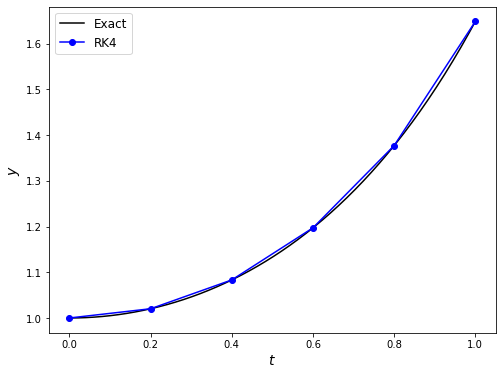

In [11]:
def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print("| $n$ | $t_n$ |   $y_n$   |   $k_1$   |   $k_2$   |   $k_3$   |   $k_4$   |")
    print("|:---:|:-----:|:---------:|:---------:|:---------:|:---------:|:---------:|")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        print(f"| {n:3} | {t[n]:5.2f} | {y[n,0]:9.6f} | {k1[0]:9.6f} | {k2[0]:9.6f} | {k3[0]:9.6f} | {k4[0]:9.6f} |")
    
    print(f"| {n+1:3} | {t[n+1]:5.2f} | {y[n+1,0]:9.6f} |     -     |     -     |     -     |     -     |")    
    
    return t, y 

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = rk4(f, tspan, y0, h)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="RK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

from myst_nb import glue
glue("rk4_example_plot", fig, display=False)

Doing a visual comparison of the solutions using the [second-order](1.4_RK2) ({numref}`rk2-example-figure`) and [fourth-order](rk4-definition) ({numref}`rk4-example-figure`) Runge-Kutta methods in it appears that the two solutions are very similar. A loglog plot of the global truncation errors for the Euler, second and fourth-order Runge-Kutta methods is shown in {numref}`rk4-gte-plot-figure`.

```{glue:figure} rk4_gte_plot
:name: rk4-gte-plot-figure

A loglog plot of the global truncation errors for the Euler and second-order Runge-Kutta method solutions of $y'=ty$, $y(0)=1$ at $t=1$.
```

Here we see that the fourth-order method is significantly more accurate than the second-order method and approximating the value of $n$ in $E = O(h^n)$ using the method given in equation {eq}`order-approximation-equation` gives $n = 4.09$ which indicates fourth-order convergence as expected.


Euler: 0.94
RK2:   2.14
RK4:   4.09


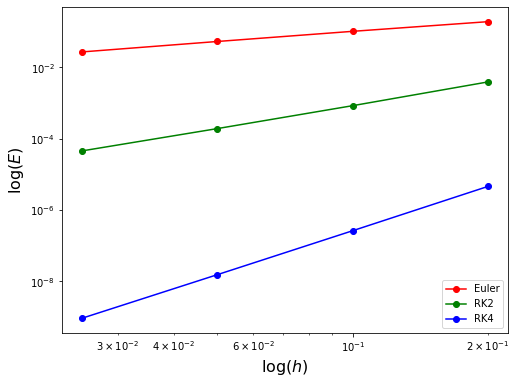

In [4]:
def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return t, y 

# Calculate solution for decreasing step lengths and plot the solution
hvalues = [0.2, 0.1, 0.05, 0.025]
rk4_errors, rk2_errors, euler_errors = [], [], []
for h in hvalues:
    t, y = rk4(f, tspan, y0, h)
    rk4_errors.append(abs(y_exact[-1] - y[-1,0]))
    t, y = rk2(f, tspan, y0, h)
    rk2_errors.append(abs(y_exact[-1] - y[-1,0]))
    t, y = euler(f, tspan, y0, h)
    euler_errors.append(abs(y_exact[-1] - y[-1,0]))

# Approximate the orders
print(f"\nEuler: {(np.log10(euler_errors[0]) - np.log10(euler_errors[-1])) / (np.log10(hvalues[0]) - np.log10(hvalues[-1])):0.2f}")
print(f"RK2:   {(np.log10(rk2_errors[0]) - np.log10(rk2_errors[-1])) / (np.log10(hvalues[0]) - np.log10(hvalues[-1])):0.2f}")
print(f"RK4:   {(np.log10(rk4_errors[0]) - np.log10(rk4_errors[-1])) / (np.log10(hvalues[0]) - np.log10(hvalues[-1])):0.2f}")


# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(hvalues, euler_errors, 'ro-', label="Euler")
plt.loglog(hvalues, rk2_errors, 'go-', label="RK2")
plt.loglog(hvalues, rk4_errors, 'bo-', label="RK4")
plt.xlabel("$\\log(h)$", fontsize=16)
plt.ylabel("$\\log(E)$", fontsize=16)
plt.legend()

glue("rk4_gte_plot", fig, display=False)